# Second order derivatives

We can similarly derive higher order derivatives in forward, backward, and central approximations.

Once obtained, we can also use the second order derivative to improve the first order derivatives!

## Forward difference (second order)

Consider the Taylor expansion:
$$
f(x+2h) = f(x)+ 2 f'(x) h + f''(x)\frac{4 h^2}{2} +O(h^3)
$$

and recall:

$$
f(x+h) = f(x)+ f'(x) h + f''(x)\frac{h^2}{2} +O(h^3)
$$

Subtracting twice the second from the first we get:

$$
\begin{align}
f(x+2h)-2 f(x+h) &= -f(x) + f''(x) h^2 +O(h^3)
\end{align}
$$

and we get the forward approximation of the second derivative:
$$
f''(x) = \frac{f(x+2h)-2 f(x+h) + f(x)}{h^2} +O(h)
$$




### Alternative derivation

Note we could also arrive at this considering the 1st derivative of the 1st derivatives:
$$ \begin{align}
f'(x) &= \frac{f(x+h) - f(x)}{h} \\
f'(x+h) &= \frac{f(x+2h) - f(x+h)}{h} \\
\end{align}
$$
and therefore,
$$
\begin{align}
f''(x) &= \frac{f'(x+h) - f'(x)}{h} \\
 &= \frac{f(x+2h) - 2 f(x+h) + f(x)}{h^2}
\end{align}
$$


which lends itself to a recursive program.

### A more accurate first derivative

We can now revisit the approximation of $f'(x)$ and use our approximation of $f''(x)$ to improve it!

*Be careful to watch the $h$'s in the following*



$$
\begin{align}
f(x+h) &= f(x) + f'(x) h + f''(x) \frac{h^2}{2} + O(h^3) \\
&= f(x) + f'(x) h + \frac{f(x+2h)-2 f(x+h) + f(x)}{h^2} \frac{h^2}{2}+ O(h^3)
\end{align}
$$

Collecting terms we reach
$$
f'(x) = \frac{-f(x+2h) + 4f(x+h) -3 f(x)}{2h} + O(h^2)
$$


This is a nice result, but notice that we now need to do three function calls to achieve the same accuracy as the central difference (2 function calls).

The general formula for $n$th order forward derivatives is:
$$f^n(x) = \sum_{i=0}^n(-1)^{n-i} {n \choose i} f(x+ih) $$

which one could use to successively improve the previous derivatives.

#### Example: Compare the error for the improved forward difference method

In [ ]:
# prompt: generate a function for the second order accurate forward difference formula

def forward_difference_2(f, x, h):
  return (-f(x + 2 * h) + 4 * f(x + h) - 3 * f(x)) / (2 * h)

a_fd2_h2 = forward_difference_2(v, t, h = 2)
a_fd2_h1 = forward_difference_2(v, t, h = 1)

np.stack([a_fd_h2-a(t), a_fd2_h2-a(t), a_fd2_h1-a(t), a_cd_h2-a(t)]).T[1:5,:]

array([[ 0.46345415, -0.01955861, -0.00472106,  0.00912883],
       [ 0.46776   , -0.01983546, -0.00478709,  0.00925508],
       [ 0.47212613, -0.02011757, -0.00485436,  0.00938366],
       [ 0.47655369, -0.02040504, -0.00492289,  0.00951465]])

## Backward difference (second order)


Following a similar derivation, the backward second derivative,
$$
f''(x) = \frac{f(x)- 2 f(x-h) + f(x-2h)}{h^2} +O(h)
$$
and *second order accurate first derivative*,

$$
f'(x) = \frac{3 f(x) - 4f(x+h) -f(x-2h)}{2h} + O(h^2)
$$

and generally,
$$f'(x) = \sum_{i=0}^n(-1)^{i} {n \choose i} f(x-ih) $$





## Central difference

Finally, subtracting hte forward and backward derivatives gives the central difference:

$$
f''(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2} +O(h^2)
$$
and the second order accurate first derivative,

$$
f'(x) = \frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h} + O(h^4)
$$
and generally,
$$f'(x) = \sum_{i=0}^n(-1)^{i} {n \choose i} f\bigg(x+\bigg[\frac{n}{2}-1\bigg]h\bigg) $$

## Summary




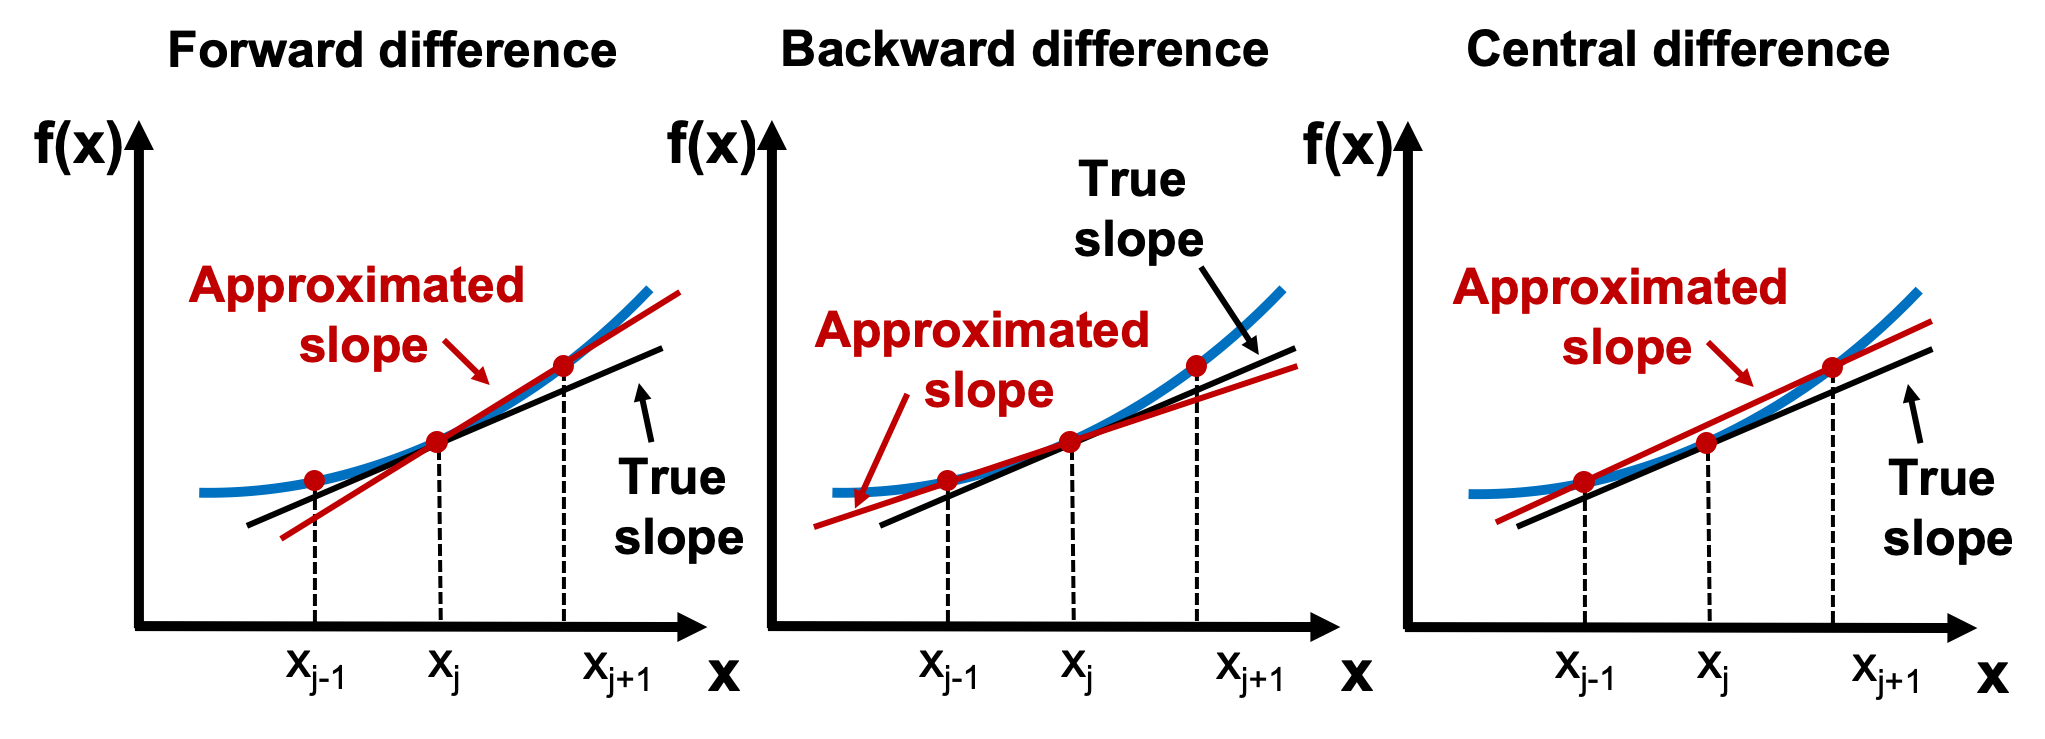

The accuracy of the approximaiton can be improved in two ways:
1.   Decrese step size
2.   Use approximated higher order derivatives to *correct* lower order derivatives, but this involves increasing numbers of function calls.

As tempting as 2) is, decresing step size is usually the better approach.

#Discrete data

Numerical methods are often applied to discrete data (or a *discretized function*).